In [1]:
from tensorflow.keras import layers

In [3]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 592.1 MB 19 kB/s 
     |████████████████████████████████| 439 kB 67.9 MB/s 
     |████████████████████████████████| 6.0 MB 61.7 MB/s 
     |████████████████████████████████| 1.7 MB 49.3 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.9.24 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.9.2


In [32]:
import string
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn import metrics


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import seaborn as sns

In [5]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2022-10-22 01:41:25--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.1s    

2022-10-22 01:41:26 (3.03 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2022-10-22 01:41:26--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==========

In [6]:
import pandas as pd
 
# Data.tsv is stored locally in the
# same directory as of this python file
df = pd.read_csv('train-data.tsv',sep = '\t')
pd.read_csv('valid-data.tsv',sep='\t')
display(df)

,ham,"ahhhh...just woken up!had a bad dream about u tho,so i dont like u right now :) i didnt know anything about comedy night but i guess im up for it."
0,ham,you can never do nothing
1,ham,"now u sound like manky scouse boy steve,like! ..."
2,ham,mum say we wan to go then go... then she can s...
3,ham,never y lei... i v lazy... got wat? dat day ü ...
4,ham,in xam hall boy asked girl tell me the startin...
...,...,...
4173,ham,just woke up. yeesh its late. but i didn't fal...
4174,ham,what do u reckon as need 2 arrange transport i...
4175,spam,free entry into our £250 weekly competition ju...
4176,spam,-pls stop bootydelious (32/f) is inviting you ...


In [11]:
s = set()
for sent in df['messages']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print("vocabulary size= ")
print(total_words_length)

vocabulary size= 
11327


In [20]:
df.head()

,Features,messages
0,ham,you can never do nothing
1,ham,"now u sound like manky scouse boy steve,like! ..."
2,ham,mum say we wan to go then go... then she can s...
3,ham,never y lei... i v lazy... got wat? dat day ü ...
4,ham,in xam hall boy asked girl tell me the startin...


In [21]:
df.tail()

,Features,messages
4173,ham,just woke up. yeesh its late. but i didn't fal...
4174,ham,what do u reckon as need 2 arrange transport i...
4175,spam,free entry into our £250 weekly competition ju...
4176,spam,-pls stop bootydelious (32/f) is inviting you ...
4177,ham,tell my bad character which u dnt lik in me. ...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178 entries, 0 to 4177
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Features  4178 non-null   object
 1   messages  4178 non-null   object
dtypes: object(2)
memory usage: 65.4+ KB


In [15]:
# Find average number of tokens in all sentences
avg_words_len=round(sum([len(i.split()) for i in df['messages']])/len(df['messages']))
print(avg_words_len)

16


In [23]:
#There are total 4178 SMS in this dataset with 2 columns Features and messages.

In [24]:
df.describe()

,Features,messages
count,4178,4178
unique,2,3934
top,ham,"sorry, i'll call later"
freq,3618,22


In [25]:
df.groupby('Features').describe().T

Features                            ham  \
messages count                     3618   
         unique                    3429   
         top     sorry, i'll call later   
         freq                        22   

Features                                                      spam  
messages count                                                 560  
         unique                                                505  
         top     hmv bonus special 500 pounds of genuine hmv vo...  
         freq                                                    3

In [ ]:
#3618 ham messages out of which 3429 are unique..
#560 span messages out of which 505 are unique.
#"Sorry, I'll call later" is the most popular ham message with repetition of 22 times.
#"hmv bonus special 500 pounds of genuine hmv vo...
#freq	" is the most popular spam message with repetition 3 times

In [26]:
def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    
    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    
    return nostop

In [28]:
spam_messages = df[df["Features"] == "spam"]["messages"]
ham_messages = df[df["Features"] == "ham"]["messages"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  560
No of ham messages :  3618


In [33]:
spam_words = text_preprocess(spam_messages)
spam_words[:10]

['call',
 'complimentary',
 'ibiza',
 'holiday',
 'cash',
 'await',
 'collection',
 'sae',
 'po',
 'box']

In [35]:
df["messages"] = df["messages"].apply(text_preprocess)
# Conver the SMS into string from list
df["messages"] = df["messages"].agg(lambda x: ' '.join(map(str, x)))
df.head()

,Features,messages
0,ham,never nothing
1,ham,u sound like manky scouse boy stevelike travel...
2,ham,mum say wan go go shun bian watch da glass exh...
3,ham,never lei v lazy got wat dat day ü send da url...
4,ham,xam hall boy asked girl tell starting term dis...


In [37]:
vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(df['messages'])

print("20 Bag of Words (BOW) Features: \n")
print(vectorizer.get_feature_names()[20:40])

print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))

20 Bag of Words (BOW) Features: 

['abuse', 'abusers', 'ac', 'academic', 'accent', 'accept', 'access', 'accessible', 'accident', 'accidentally', 'accommodation', 'accomodate', 'accordin', 'accordingly', 'accordinglyor', 'account', 'accounts', 'accumulation', 'ache', 'achieve']

Total number of vocab words :  6895


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
messages_bow = bow_transformer.transform(df['messages'])
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)


Shape of Sparse Matrix:  (4178, 6895)
Amount of Non-Zero occurences:  33385


In [42]:
message4 = df['messages'][3]
print(message4)

never lei v lazy got wat dat day ü send da url cant work one


In [43]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 831)	1
  (0, 1317)	1
  (0, 1351)	1
  (0, 1362)	1
  (0, 2377)	1
  (0, 3240)	1
  (0, 3264)	1
  (0, 3925)	1
  (0, 4114)	1
  (0, 5168)	1
  (0, 6333)	1
  (0, 6506)	1
  (0, 6696)	1
(1, 6895)


In [44]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 6696)	0.24753452349565283
  (0, 6506)	0.25169262076958665
  (0, 6333)	0.4251008873476404
  (0, 5168)	0.2161817509331697
  (0, 4114)	0.2241735956846072
  (0, 3925)	0.28577803269083335
  (0, 3264)	0.3228446515839004
  (0, 3240)	0.35113809983526745
  (0, 2377)	0.20577393364856125
  (0, 1362)	0.21548422356782315
  (0, 1351)	0.29360001594437596
  (0, 1317)	0.2362963775738202
  (0, 831)	0.24014441798987687


In [45]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4178, 6895)


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(df["messages"])
print(features.shape)

print(len(vec.vocabulary_))

(4178, 6743)
6743


In [152]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages_tfidf, df['Features'], test_size=0.2)

In [48]:
print("train dataset features size : ",msg_train.shape)
print("train dataset label size", label_train.shape)

print("\n")

print("test dataset features size", msg_test.shape)
print("test dataset lable size", label_test.shape)

train dataset features size :  (3342, 6895)
train dataset label size (3342,)


test dataset features size (836, 6895)
test dataset lable size (836,)


In [49]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
spam_detect_model = clf.fit(msg_train, label_train)

In [154]:
predict_train = spam_detect_model.predict(msg_train[10])
print(predict_train)

['ham']


In [148]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df['Features'][3])

predicted: ham
expected: ham


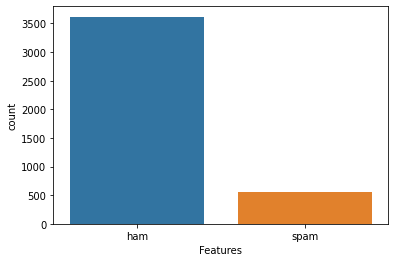

In [10]:
sns.countplot(x=df['Features'])
plt.show()

In [ ]:
#prediction example

In [144]:
pred_text="Hey ,Call me later"

In [145]:
message3 = pred_text
print(message3)
bow3 = bow_transformer.transform([message3])
print(bow3)
print(bow3.shape)

Hey ,Call me later
  (0, 796)	1
  (0, 2590)	1
  (0, 3224)	1
(1, 6895)


In [146]:
tfidf3 = tfidf_transformer.transform(bow3)
print(tfidf3)

  (0, 3224)	0.6226518666703217
  (0, 2590)	0.6450023733884245
  (0, 796)	0.4430311402771406


In [147]:
print('predicted:', spam_detect_model.predict(tfidf3))

predicted: ['ham']
